## Importing Libraries

In [1]:
import pandas as pd
import numpy as np  
from matplotlib import pyplot as plt
import seaborn as sns   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings("ignore")

## Reading Dataset

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0


## Exploratory Data Analysis

In [4]:
df.dtypes

id                     int64
BertzCT              float64
Chi1                 float64
Chi1n                float64
Chi1v                float64
Chi2n                float64
Chi2v                float64
Chi3v                float64
Chi4n                float64
EState_VSA1          float64
EState_VSA2          float64
ExactMolWt           float64
FpDensityMorgan1     float64
FpDensityMorgan2     float64
FpDensityMorgan3     float64
HallKierAlpha        float64
HeavyAtomMolWt       float64
Kappa3               float64
MaxAbsEStateIndex    float64
MinEStateIndex       float64
NumHeteroatoms         int64
PEOE_VSA10           float64
PEOE_VSA14           float64
PEOE_VSA6            float64
PEOE_VSA7            float64
PEOE_VSA8            float64
SMR_VSA10            float64
SMR_VSA5             float64
SlogP_VSA3           float64
VSA_EState9          float64
fr_COO                 int64
fr_COO2                int64
EC1                    int64
EC2                    int64
EC3           

all features are in the required format

In [6]:
df.isnull().sum()

id                   0
BertzCT              0
Chi1                 0
Chi1n                0
Chi1v                0
Chi2n                0
Chi2v                0
Chi3v                0
Chi4n                0
EState_VSA1          0
EState_VSA2          0
ExactMolWt           0
FpDensityMorgan1     0
FpDensityMorgan2     0
FpDensityMorgan3     0
HallKierAlpha        0
HeavyAtomMolWt       0
Kappa3               0
MaxAbsEStateIndex    0
MinEStateIndex       0
NumHeteroatoms       0
PEOE_VSA10           0
PEOE_VSA14           0
PEOE_VSA6            0
PEOE_VSA7            0
PEOE_VSA8            0
SMR_VSA10            0
SMR_VSA5             0
SlogP_VSA3           0
VSA_EState9          0
fr_COO               0
fr_COO2              0
EC1                  0
EC2                  0
EC3                  0
EC4                  0
EC5                  0
EC6                  0
dtype: int64

- no null values are present

## Seperation of Dependent and Independent Feature

In [7]:
target1=df['EC1']
target2=df['EC2']

In [8]:
df.drop(['id','EC3','EC4','EC5','EC6','EC1','EC2'],axis=1,inplace=True)

In [9]:
df.describe()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,...,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,515.153604,9.135189,5.854307,6.738497,4.432570,5.253221,3.418749,1.773472,29.202823,10.435316,...,17.790011,8.962440,11.318811,6.704487,15.666766,31.066423,13.636941,49.309959,0.458215,0.459226
std,542.456370,6.819989,4.647064,5.866444,3.760516,4.925065,3.436208,1.865898,31.728679,13.651843,...,34.561655,19.756727,20.169745,10.865415,18.080208,33.896638,14.598554,29.174824,0.667948,0.668111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.430556,0.000000,0.000000
25%,149.103601,4.680739,2.844556,2.932842,1.949719,2.034468,1.160763,0.503897,5.969305,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.969305,6.420822,4.794537,30.000000,0.000000,0.000000
50%,290.987941,6.485270,4.052701,4.392859,2.970427,3.242775,1.948613,1.073261,17.353601,6.420822,...,5.969305,0.000000,0.000000,0.000000,11.752550,20.075376,9.589074,41.666667,0.000000,0.000000
75%,652.652585,11.170477,7.486791,8.527859,5.788793,6.609350,4.502070,2.534281,44.876559,12.841643,...,15.645394,12.132734,13.847474,6.923737,17.721856,42.727765,14.912664,56.090650,1.000000,1.000000
max,4069.959780,69.551167,50.174588,53.431954,32.195368,34.579313,22.880836,16.072810,363.705954,99.936429,...,482.434223,375.425148,211.501279,100.348416,80.742293,492.729739,115.406157,384.450519,8.000000,8.000000


## Plotting and Visualization

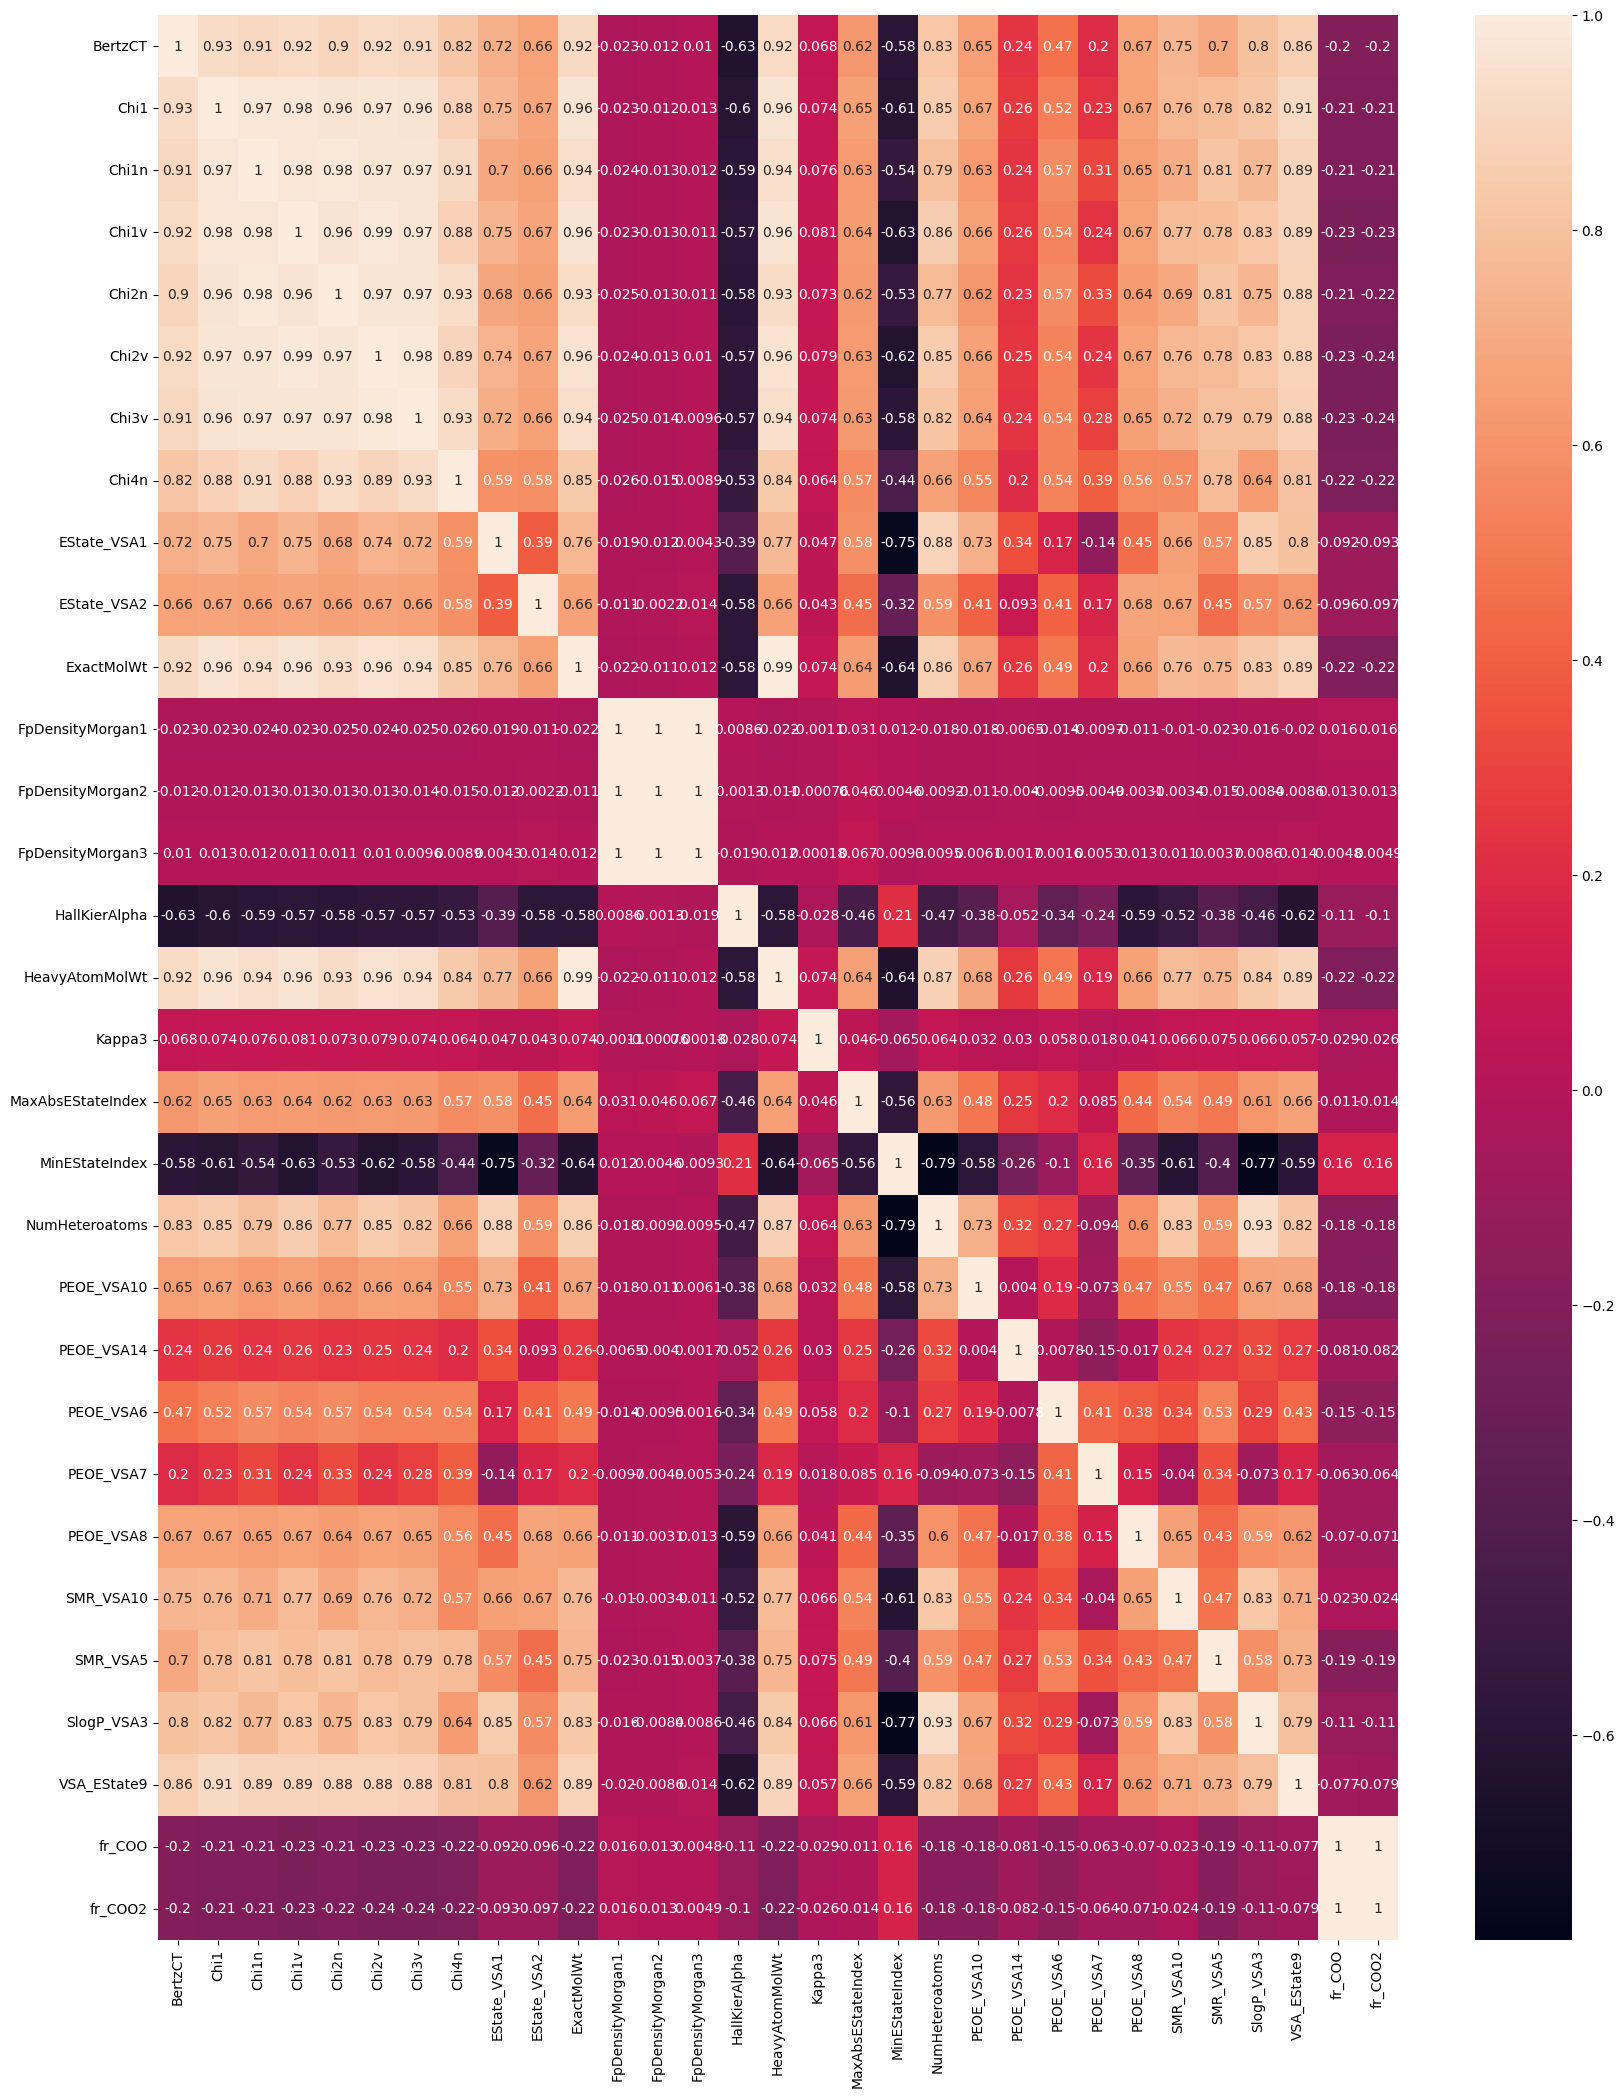

In [13]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(),annot=True)
plt.show()

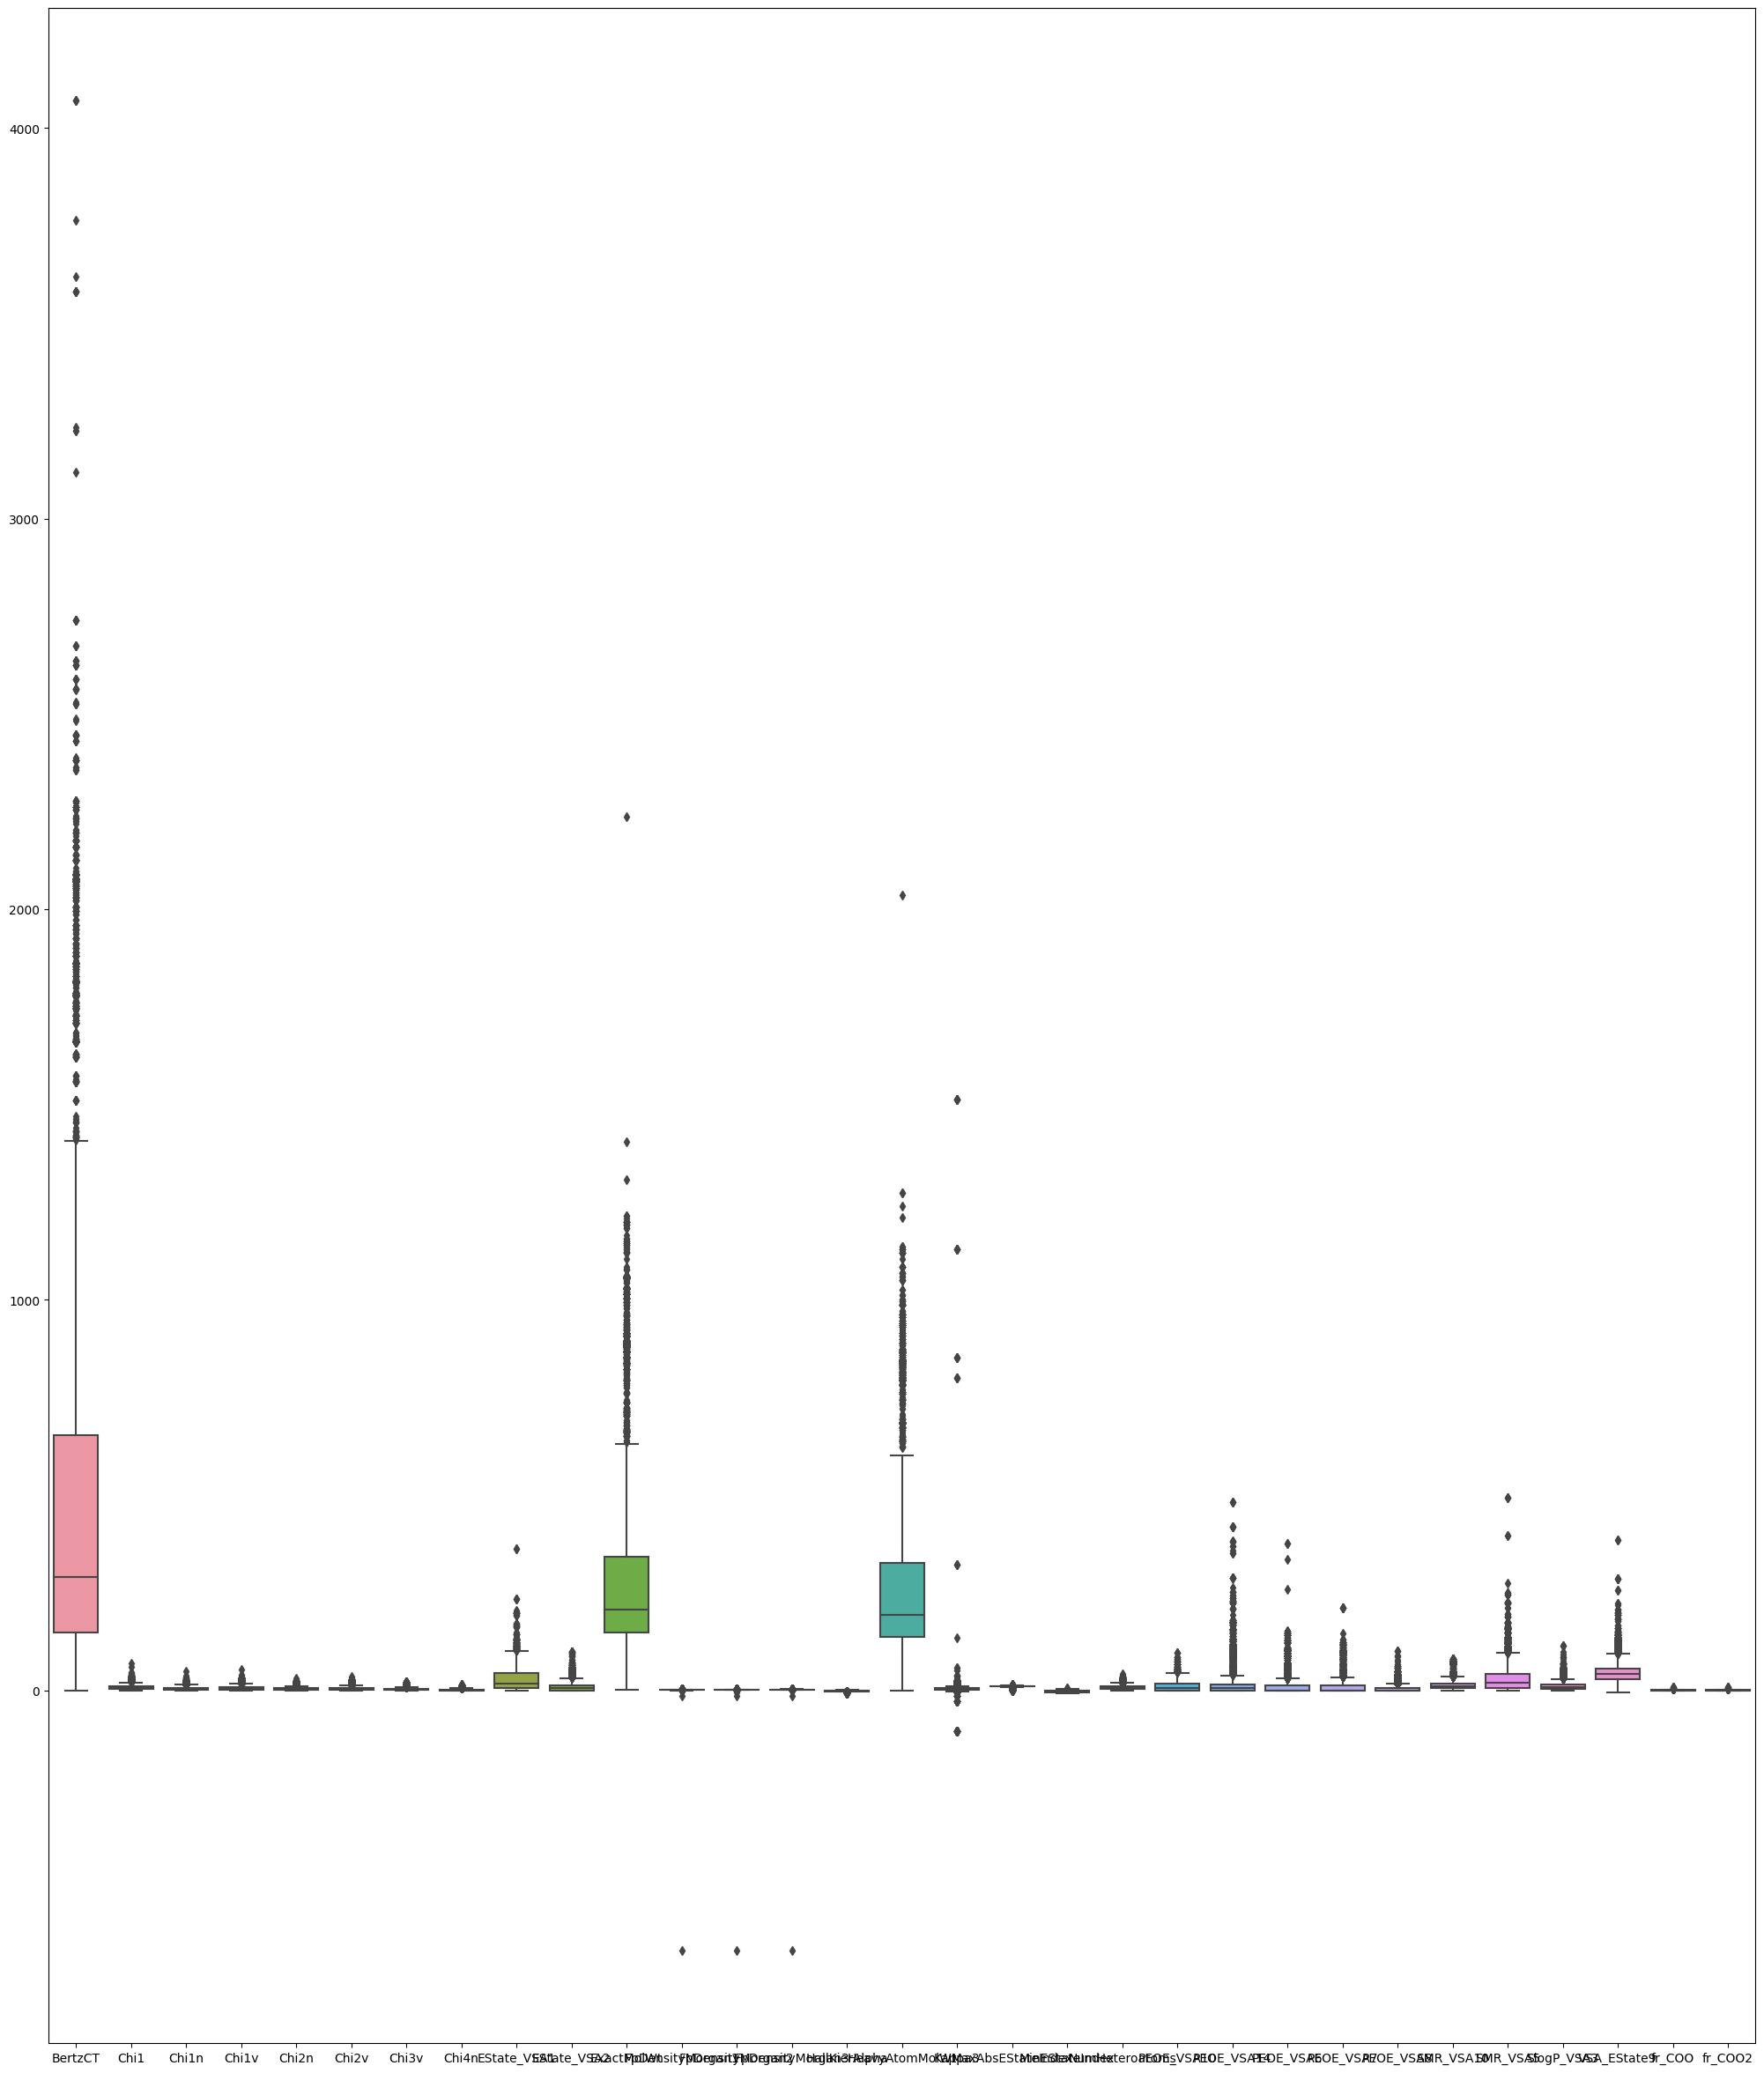

In [14]:
plt.figure(figsize=(25,30))
sns.boxplot(data=df)
plt.show()

- almost all features has outliers

In [15]:
scaler=StandardScaler()

In [16]:
data=scaler.fit_transform(df)

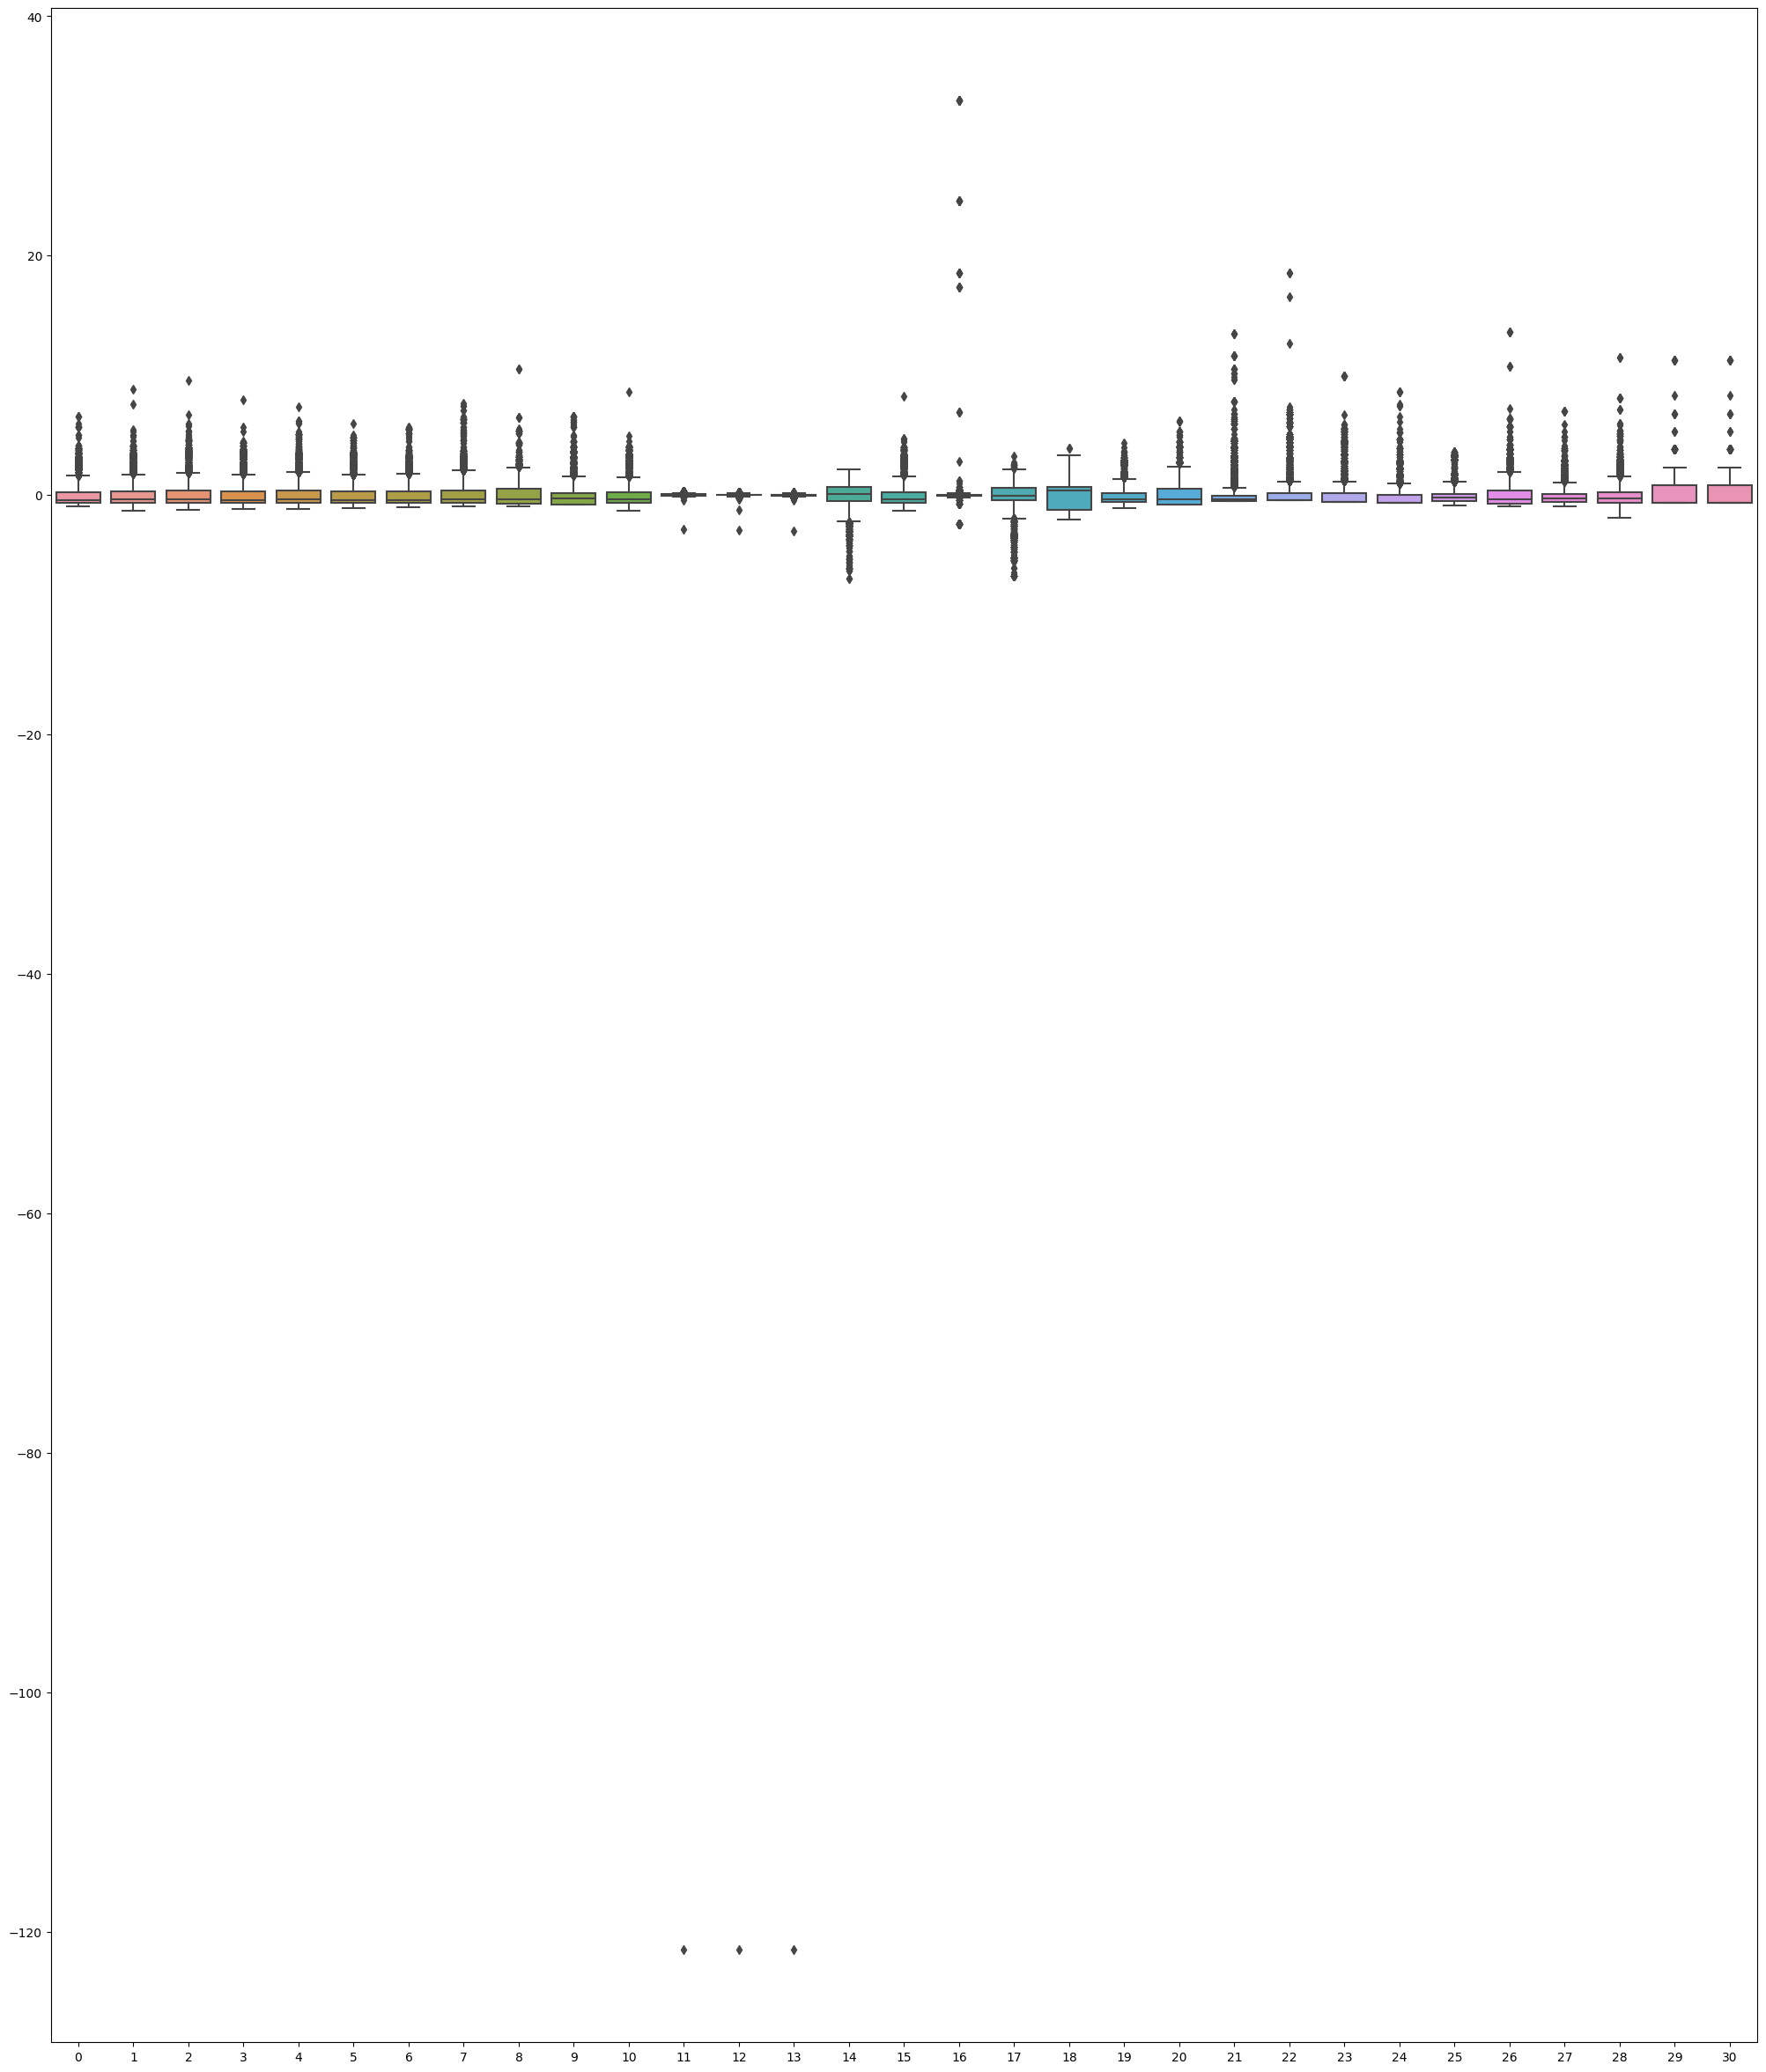

In [17]:
plt.figure(figsize=(25,30))
sns.boxplot(data=data)
plt.show()

## Splitting of Training and testing datasets

In [18]:
x_train,x_test,y_train,y_test=train_test_split(data,target1,test_size=0.20,random_state=45)

model1 for EC1

In [19]:
params={"criterion":['gini','entropy','log_loss'],"splitter":['best','random'],"max_depth":[2,4,6,8,10],"max_features":["auto",'sqrt','log2']}

In [20]:
grid=GridSearchCV(DecisionTreeClassifier(),param_grid=params,cv=5)

In [21]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [22]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'best'}

In [23]:
model1_ec1=DecisionTreeClassifier(criterion='gini',max_depth=4,max_features='auto',splitter='best')

In [24]:
model1_ec1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features='auto')

In [25]:
y1_pred=model1_ec1.predict(x_test)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.59      0.32      0.42       998
           1       0.72      0.88      0.79      1970

    accuracy                           0.70      2968
   macro avg       0.65      0.60      0.61      2968
weighted avg       0.68      0.70      0.67      2968



model1 for EC2

In [28]:
grid2=GridSearchCV(DecisionTreeClassifier(),param_grid=params)

In [29]:
x2_train,x2_test,y2_train,y2_test=train_test_split(data,target2,test_size=0.20,random_state=45)

In [30]:
grid2.fit(x2_train,y2_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [31]:
grid2.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'auto',
 'splitter': 'random'}

In [33]:
model1_ec2=DecisionTreeClassifier(criterion='entropy',max_depth=2,max_features='auto',splitter='random')

In [34]:
model1_ec2.fit(x2_train,y2_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='auto',
                       splitter='random')

In [35]:
y2_pred=model1_ec2.predict(x2_test)

In [36]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       619
           1       0.79      1.00      0.88      2349

    accuracy                           0.79      2968
   macro avg       0.40      0.50      0.44      2968
weighted avg       0.63      0.79      0.70      2968



## Model2 Logistic Regression

for EC1

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
params={"penalty":['l1','l2','elasticnet',None],"C":[1,10,20,30,40],'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']}

In [39]:
grid3=GridSearchCV(estimator=LogisticRegression(),param_grid=params,cv=5)

In [40]:
grid3.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20, 30, 40],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [41]:
grid3.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [42]:
model2_ec1=LogisticRegression(C=1,penalty='l2',solver='lbfgs')

In [43]:
model2_ec1.fit(x_train,y_train)

LogisticRegression(C=1)

In [45]:
print(classification_report(y_test,model2_ec1.predict(x_test)))

              precision    recall  f1-score   support

           0       0.57      0.31      0.40       998
           1       0.72      0.88      0.79      1970

    accuracy                           0.69      2968
   macro avg       0.64      0.60      0.60      2968
weighted avg       0.67      0.69      0.66      2968



In [46]:
grid3=GridSearchCV(estimator=LogisticRegression(),param_grid=params,cv=5)

In [47]:
grid3.fit(x2_train,y2_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20, 30, 40],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [48]:
grid3.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [49]:
model2_ec2=LogisticRegression(C=1,penalty='l1',solver='liblinear')

In [50]:
model2_ec2.fit(x2_train,y2_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [51]:
print(classification_report(y2_test,model2_ec2.predict(x2_test)))

              precision    recall  f1-score   support

           0       0.50      0.00      0.00       619
           1       0.79      1.00      0.88      2349

    accuracy                           0.79      2968
   macro avg       0.65      0.50      0.44      2968
weighted avg       0.73      0.79      0.70      2968



## Support Vector Classifier

In [52]:
from sklearn.svm import SVC

In [53]:
model3_ec1=SVC()

In [54]:
model3_ec1.fit(x_train,y_train)

SVC()

In [55]:
print(classification_report(y_test,model3_ec1.predict(x_test)))

              precision    recall  f1-score   support

           0       0.62      0.33      0.43       998
           1       0.73      0.90      0.80      1970

    accuracy                           0.71      2968
   macro avg       0.67      0.61      0.62      2968
weighted avg       0.69      0.71      0.68      2968



In [56]:
model3_ec2=SVC()

In [57]:
model3_ec2.fit(x2_train,y2_train)

SVC()

In [58]:
print(classification_report(y2_test,model3_ec2.predict(x2_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       619
           1       0.79      1.00      0.88      2349

    accuracy                           0.79      2968
   macro avg       0.40      0.50      0.44      2968
weighted avg       0.63      0.79      0.70      2968



In [37]:
df_test=pd.read_csv('test.csv')

In [38]:
df_test.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,14838,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,...,13.512441,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1
1,14839,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,...,0.000000,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0
2,14840,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,...,5.969305,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1
3,14841,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,...,59.935299,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0
4,14842,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,...,23.468091,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0


In [39]:
id=df_test['id']

In [40]:
df_test.drop('id',axis=1,inplace=True)

In [41]:
data=scaler.fit_transform(df_test)

In [42]:
test1_pred=model1_ec1.predict(data)

In [43]:
test2_pred=model1_ec2.predict(data)

In [44]:
test1_pred.shape

(9893,)

In [45]:
test2_pred.shape

(9893,)

In [46]:
id.shape

(9893,)

In [47]:
submission=pd.DataFrame(np.array(id),columns=['id'])

In [48]:
submission

,id
0,14838
1,14839
2,14840
3,14841
4,14842
...,...
9888,24726
9889,24727
9890,24728
9891,24729


In [49]:
submission['EC1']=test1_pred

In [50]:
submission['EC2']=test2_pred

In [51]:
submission.head()

,id,EC1,EC2
0,14838,0,1
1,14839,1,1
2,14840,1,1
3,14841,1,1
4,14842,1,1


In [52]:
# submission.to_csv("submission.csv")